### Random Forest Regression for predicting impact energy
#### Ref:  https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [2]:
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read in data and display first 5 rows

def linear(m,x):
    return m*x


features0 = pd.read_excel('../Paper/WearPaper/time_energy_wear_rate_forK2_test2.xlsx')
# features = pd.read_excel('../Paper/WearPaper/time_energy_wear_rate_forK2_test2.xlsx')


# multiply
for i in range(2):
    features0 = features0.append(features0)

features = features0
# features.set_index('id')
# print(features.head(5))

# features = features.iloc[20:-18,:] # remove D=127 and last 18 rows
# features = features.iloc[:100,:] # remove last 18 rows
# f = features['N'] < 0.65
# features = features[f]
# features = features[(features["N"] == 0.7)]
print('The shape of our features is:', features.shape)


# Descriptive statistics for each column
#print(features.describe())


# One-hot encode the data using pandas get_dummies
# features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
# print(features.iloc[5:8,:].head(5))
print(features.columns)

extdata = features['k1'] < 2
features = features[extdata]
# print(features)
# features = features[features['k1'] < 1000]


The shape of our features is: (1076, 26)
Index(['id', 'z', 'd/mesh', 'T', 'normT', 'h', 'h/z', 'atan', 'normz', 'normh',
       'Hardness', 'A', 'E/A', 'normE', 'finnei', 'shear', 'IESM',
       'F_plus_IESM', 'wear_rate(mm/hr)', 'wear_rate_percentage', 'k', 'k1',
       'averageE', 'ratio', 'const', 'const2'],
      dtype='object')


### Explore data

In [2]:

# import seaborn as sns
# plt.subplots(figsize=(20,15))
# sns.heatmap(features.corr(), annot=True)
# features.describe()
# sns.pairplot(features)
# sns.distplot(features['IE_per_mass'], bins=40)
# print("columns:", features.columns)

In [3]:
# Use numpy to convert to arrays
import numpy as np


# Labels are the values we want to predict
# features = features.iloc[14:,:] # remove top 14 rows

# features[features['N'] == 0.7]

labels = np.array(features['const'])
# labels = np.array(features['Power/mass'])
# labels = np.array(features['Power/mass'])


# print(features.head())
max_IE_per_mass = labels.max()
# labels = labels/max_IE_per_mass
# print(max_IE_per_mass)

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('id', axis = 1)
features= features.drop('k1', axis = 1)
features= features.drop('k', axis = 1)
features= features.drop('wear_rate_percentage', axis = 1)
features= features.drop('wear_rate(mm/hr)', axis = 1)
features= features.drop('IESM', axis = 1)
features= features.drop('h', axis = 1)
features= features.drop('z', axis = 1)
features= features.drop('F_plus_IESM', axis = 1)
features= features.drop('finnei', axis = 1)
features= features.drop('Hardness', axis = 1)
features= features.drop('A', axis = 1)

features= features.drop('h/z', axis = 1)
# features= features.drop('normT', axis = 1)
features= features.drop('atan', axis = 1)
features= features.drop('T', axis = 1)
features= features.drop('E/A', axis = 1)
features= features.drop('averageE', axis = 1)
features= features.drop('shear', axis = 1)
features= features.drop('normE', axis = 1)
# features= features.drop('normh', axis = 1)
features= features.drop('const', axis = 1)
features= features.drop('const2', axis = 1)
features= features.drop('ratio', axis = 1)
# features= features.drop('normz', axis = 1)

print(features.columns)

# Saving feature names for later use
# print(type(f))
# print(features.isnull().sum())


# from sklearn.preprocessing import StandardScaler

# Scaling
# scaler = StandardScaler()
# scaler.fit(features)
# scaled_data = scaler.transform(features)
# features = scaled_data

# Convert to numpy array
# features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)




print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)



# The baseline predictions are the historical averages
# baseline_preds = test_features[:, feature_list.index('average')]
# # Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
# print('Average baseline error: ', round(np.mean(baseline_errors), 2))

# Write test data
# test_data = X_test
# test_data['k1'] = y_test
# test_data.to_excel("../Paper/WearPaper/kkk.xlsx")




# print(X_test)

# Transform numpy array to data frame
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# scaler.fit(X_test)
# X_test_scaled = scaler.transform(X_test)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


#scaler_data_max_


# X_test_scaled.describe()


Index(['d/mesh', 'normT', 'normz', 'normh'], dtype='object')
Training Features Shape: (753, 4)
Training Labels Shape: (753,)
Testing Features Shape: (323, 4)
Testing Labels Shape: (323,)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Hyperparameter tuning

In [5]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

# rf_random.best_params_



### Train the model

In [6]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees


# with shear energy
rf = RandomForestRegressor(n_estimators = 1000, min_samples_split = 5,
                           min_samples_leaf = 2,max_features='sqrt',max_depth=100,bootstrap=False,
                            random_state = 42)

# rf = RandomForestRegressor(n_estimators = 1000, min_samples_split = 2,
#                            min_samples_leaf = 2,max_features='sqrt',max_depth=60,bootstrap=True,
#                             random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train);
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors), 'wear_rate.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# RMS
mean_squared_error(y_test,predictions)**0.5
print("R2 :",r2_score(y_test,predictions,multioutput='variance_weighted'))

print("DONE")

Mean Absolute Error: 0.012207279122688814 wear_rate.
Accuracy: 88.75 %.
R2 : 0.9867078949839581
DONE


### Prediction

In [7]:

# valid = errors < 5
# invalid = errors > 5
# count = 0
# for i in range(len(valid)):
#     if(valid[i]):
# #         print(errors[i])
#         count += 1
    
        
# print(count/len(X_test))
# print(type(X_test))
# print(X_test[invalid])

# newf = features0.drop(features0.index[[30, 79, 190, 137, 202, 173, 267, 220, 82, 265, 104, 60, 42, 22, 193, 109, 24, 143, 217, 6, 118, 165, 19, 90, 170, 15, 242, 33, 141, 250, 16, 228, 152]])
# newf.to_excel('../Paper/WearPaper/time_energy_wear_rate_forK2_test2_refined22.xlsx')



# print(X_test)

### Determine Performance Metrics

### Variable Importances
#### In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. 

In [8]:
# Get numerical feature importances
# importances = list(rf.feature_importances_)
# # List of tuples with variable and importance
# feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Sort the feature importances by most important first
# feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

### Visualization


In [9]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
# import matplotlib.pyplot as plt
# %matplotlib inline
# # Set the style
# plt.style.use('fivethirtyeight')
# # list of x locations for plotting
# x_values = list(range(len(importances)))
# # Make a bar chart
# plt.bar(x_values, importances, orientation = 'vertical')
# # Tick labels for x axis
# plt.xticks(x_values, feature_list, rotation='vertical')
# # Axis labels and title
# plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Prediciton for HICOM mill

In [10]:
df0 = pd.read_excel('../test_code_new/4267mm/36mm/prediction_1-2.xlsx', sheet_name='1-2')
features= df0.drop('z', axis = 1)
features= features.drop('z_raw', axis = 1)
features= features.drop('h', axis = 1)
features= features.drop('finnei', axis = 1)
features= features.drop('d', axis = 1)
features= features.drop('E/A', axis = 1)
features= features.drop('shear', axis = 1)
features= features.drop('h/z', axis = 1)
# features= features.drop('normh', axis = 1)
features= features.drop('normE', axis = 1)
features= features.drop('newh', axis = 1)
features= features.drop('k1', axis = 1)
features= features.drop('modnewh', axis = 1)

# features= features.drop('atan', axis = 1)

print(features.columns)

scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)


predictions = rf.predict(scaled_features)
df = pd.DataFrame(predictions, columns=['k1'])

dt = 1924
df0['k1'] = predictions
# df0['newh'] = np.array(df0['h']) - dt*(0.001*np.array(df0['k1'])*1e-6*np.array(df0['shear']))/(2000*64*1e-6) # with k 
# df0['newh'] = np.array(df0['h']) - dt*df0['k1']*(50.0/100.0)/50000.0 # with worn percentage
df0['newh'] = np.array(df0['h']) - 41*dt*np.array(df0['k1'])*1e-6*np.array(df0['shear'])*(50.0/100.0)/700 # with worn percentage

print(df0.tail())

df0.to_excel('../test_code_new/4267mm/36mm/k_1_2.xlsx')


Index(['d/mesh', 'normT', 'normz', 'normh'], dtype='object')
      z  z_raw  d/mesh  normT       h/z          h     normz     normh  \
19  156    160     4.5      1  0.163334  25.480158  0.709091  0.509603   
20  164    168     4.5      1  0.117034  19.193505  0.745455  0.383870   
21  172    176     4.5      1  0.076699  13.192166  0.781818  0.263843   
22  180    184     4.5      1  0.043734   7.872153  0.818182  0.157443   
23  188    192     4.5      1  0.019377   3.642808  0.854545  0.072856   

       normE     finnei   shear       E/A    d       newh        k1    modnewh  
19  0.125322  36.994679  3500.0  0.762019  600  25.367504  0.571239  24.005426  
20  0.089516  48.769187  2500.0  0.628732  600  19.109912  0.593434  17.739725  
21  0.053709  40.238872  1500.0  0.001234  600  13.143805  0.572185  12.419552  
22  0.035806   0.078999  1000.0  0.678749  600   7.841154  0.550158   7.353983  
23  0.035806  43.439952  1000.0  0.200000  600   3.605659  0.659301   3.083363  


### Test for large scale

In [11]:
# features = pd.read_excel('../Paper/WearPaper/test_time_energy_wear.xlsx')
features0 = pd.read_excel('../Paper/WearPaper/kkk.xlsx')
features = pd.read_excel('../Paper/WearPaper/kkk.xlsx')

# features = features[(features["N"] == 0.7)]
# features = pd.read_excel('../test_code_new/test_data.xlsx')

# features = features.iloc[:-3,:] # 
# print(features.tail())
# print("NO OF FEATURES",len(features0))

actual = np.array(features['k1'])



# Remove the labels from the features
# axis 1 refers to the columns

features= features.drop('k1', axis = 1)
features= features.drop('id', axis = 1)
# features= features.drop('IESM', axis = 1)
# features= features.drop('F_plus_IESM', axis = 1)
# features= features.drop('shear', axis = 1)


# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
scaled_data = scaler.transform(features)
# print(np.shape(scaled_data))
# scaled_data = pd.DataFrame(scaled_data, columns=features.columns)

predictions = rf.predict(scaled_data)
print("NO OF PREDICTIONS", len(predictions))
# print(actual)
# print(predictions)


NO OF PREDICTIONS 323


### Compare actual vs prediction

In [12]:
# Calculate the absolute errors
errors = abs(predictions - actual)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'IE_per_mass.')

maxlim = 0
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors[maxlim:] / actual[maxlim:])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# RMS
print("Mean Sq Error :",mean_squared_error(actual,predictions)**0.5)
print("r2 score :",r2_score(actual,predictions))
print(actual[maxlim])

Mean Absolute Error: 0.01221 IE_per_mass.
Accuracy: 88.75 %.
Mean Sq Error : 0.028392058566499876
r2 score : 0.9867078949839581
0.1798668503242436


[58, 59, 58, 59, 58]
Total 323
Valied 318
[0.17986685 0.24209816 0.6351061  0.03095949 0.44374328 0.33857506
 0.23898628 0.21909009 0.71093056 0.41240145 0.28332153 0.34836111
 0.33394031 0.50930936 0.30389172 0.23898628 0.61565642 0.04055889
 0.29577219 0.51587718 0.29441902 0.79673062 0.27129088 0.63559626
 0.63559626 0.05122799 0.10488572 0.11900087 0.55277791 0.26033758
 0.26986782 0.16704068 0.05122799 0.49665743 0.04055889 0.41055355
 0.19663018 0.40933954 0.33092362 0.19752648 0.14617451 0.13180711
 0.26075824 0.76582396 0.27444015 0.21220291 0.17552469 0.26769568
 0.59300764 0.33446254 0.19110283 0.28878742 0.41103569 0.30389172
 0.34203247 0.33092362 0.61565642 0.90678613 0.14617451 0.29577219
 0.87116392 0.33446254 0.52917404 0.13115873 0.40933954 0.70350102
 0.15537317 0.10935369 0.01193752 0.25413243 0.29441902 0.26781336
 0.52917404 0.12462035 0.020521   0.05572609 0.09598654 0.86984729
 0.36481176 0.77187779 0.88376317 0.2037167  0.13180711 0.26145602
 0.56390838 0.113483

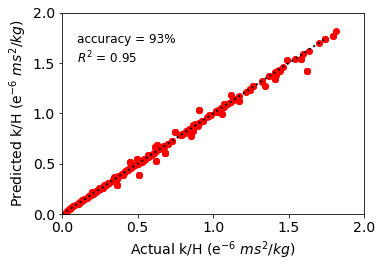

In [21]:
import matplotlib.pyplot as plt
# Plot actual and prediction

plt.rc('axes', labelsize=14) #font size of axes label
plt.rc('xtick', labelsize=14) #font size of tick label
plt.rc('ytick', labelsize=14) #font size of tick label

fig = plt.figure()
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.set_xlim(0,2)
ax.set_ylim(0,2)

x = np.arange(0,1.8,0.05)
m = 1
y = linear(m, x)


maxlim = len(actual)
valid = []
invalid = []
newAct = []
newPred = []

for i in range(len(actual)):
    if (actual[i]/predictions[i] > 0.5 and actual[i]/predictions[i] < 1.5):
#         valid.append(True)
        newAct.append(actual[i])
        newPred.append(predictions[i])
    else:
        valid.append(False)
        invalid.append(features0['id'].iloc[i])
#         invalid.append((features.iloc[i:i+1,:],"  ",str(actual[i]/predictions[i])))
# # valid = (actual[maxlim:]/predictions[maxlim:] > 0.9 and actual[maxlim:]/predictions[maxlim:] < 1.0)

print(invalid)

# print(invalid)

# newAct = []
# newPred = []

# count = 0
# for i in range(len(valid)):
#     if(valid[i]):
#         newAct.append(actual[i+maxlim])
#         newPred.append(predictions[i+maxlim])
#         count += 1

# print("TOTAL DATA",len(actual[maxlim:]))
# print("NO OF INVALID",len(invalid))
# print("NO OF VALID", count)       
        
# print(actual[maxlim:]/predictions[maxlim:] > 0.9)

# valid = actual[:]

print("Total",len(actual))
print("Valied",len(newAct))
# print("Valid percentage",100*len(newAct)/len(actual))



# Calculate the absolute errors
newPred = np.array(newPred)
newAct = np.array(newAct)
errors = abs(newPred - newAct)

for i in range(len(newPred)):
    if(newPred[i] < newAct[i]*0.7):
        newPred[i] = newPred[i]*1.2
        
for i in range(len(newPred)):
    if(newPred[i] > newAct[i]*1.2):
        newPred[i] = newPred[i]*0.8

valid = newAct < 0.95
validAct = newAct[valid]
validPre = newPred[valid]
print(validPre)

# for i in range(len(newAct)):
#     if(newAct[i] < 0.8):
        
        
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 5), 'IE_per_mass.')

maxlim = 0
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors[maxlim:] / newAct[maxlim:])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# RMS
print("Mean Sq Error :",mean_squared_error(newAct,newPred)**0.5)
print("r2 score :",r2_score(newAct,newPred))



ax.scatter(2.*validAct, 2.*validPre,label="Prediction D >= 2000 mm",c='red')
# ax.scatter(actual[:maxlim], predictions[:maxlim],label="Test data",c='red', alpha=1.0)
# ax.scatter(actual[maxlim:], predictions[maxlim:],label="Prediction D >= 2000 mm",c='blue')


# print(actual)
# ax.scatter(actual[:], predictions[:],c='blue')
ax.plot(x,y,color='black', linestyle='dotted',linewidth=2.0, alpha=1)

ax.set_ylabel("Predicted k/H (e$^{-6}$ $ms^{2}/kg$)")
ax.set_xlabel("Actual k/H (e$^{-6}$ $ms^{2}/kg$)")
# ax.set_ylabel("Predicted k")
# ax.set_xlabel("Actual k")
# ax.text(2150, 0.55, '$D_{50}$', fontsize=15)

ax.text(0.1, 1.7, 'accuracy = 93%', fontsize=12)
ax.text(0.1, 1.5, '$R^{2}$ = 0.95', fontsize=12)
# ax.text(0.55, 1.7, 'Prediction D = 2000 mm', fontsize=12)
# ax.text(0.55, 1.6, 'Prediction D = 4000 mm', fontsize=12)
# ax.legend(loc="upper right")
# lg = ax.legend(loc="upper left")
# lg.get_frame().set_alpha(0)

plt.show()

import os
# save figure
path = "../Paper/WearPaper/fig"
fout = os.path.join(path, "RandomForest_k.jpg")
fig.savefig(fout, dpi=300)


In [14]:
# # Use datetime for creating date objects for plotting
# import datetime

# # Dates of training values
# months = features[:, feature_list.index('month')]
# days = features[:, feature_list.index('day')]
# years = features[:, feature_list.index('year')]


# # List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# # Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# # Dates of predictions
# months = test_features[:, feature_list.index('month')]
# days = test_features[:, feature_list.index('day')]
# years = test_features[:, feature_list.index('year')]

# # Column of     
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year,






# month, day in zip(years, months, days)]

# # Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# # Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# # Plot the actual values
# plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# # Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()

# # Graph labels
# plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

In [15]:
# # Make the data accessible for plotting
# true_data['temp_1'] = features[:, feature_list.index('temp_1')]
# true_data['average'] = features[:, feature_list.index('average')]
# true_data['friend'] = features[:, feature_list.index('friend')]
# # Plot all the data as lines
# plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
# plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
# plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
# plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# # Formatting plot
# plt.legend(); plt.xticks(rotation = '60');
# # Lables and title
# plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');